In [1]:
import numpy as np
from matplotlib import pyplot as plt

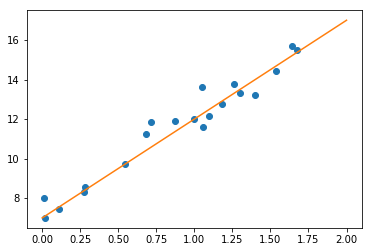

In [57]:
#totalité des données
X0 = 2 * np.random.rand(100, 1)
Y0 = 5 * X0 + 7 + np.random.randn(100, 1)

#données d'aprentissage, m données
m = 20
Xr = X0[0:20,:]
Yr = Y0[0:20,:]
plt.plot(Xr,Yr,'o')
Xd = np.linspace(0,2,100)
Yd = 5*Xd + 7
plt.plot(Xd,Yd)
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
linreg = LinearRegression()

In [60]:
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [61]:
linreg.fit(Xr,Yr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
Xd = Xd.reshape(-1,1)


In [63]:
Ypred = linreg.predict(Xd)

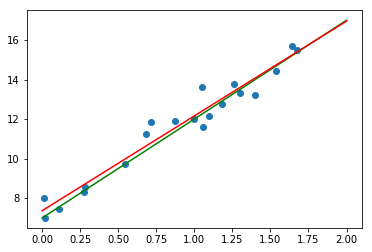

In [64]:
plt.plot(Xr,Yr,'o')
plt.plot(Xd,Yd, c= 'green')
plt.plot(Xd,Ypred, c='red')
plt.show()

In [69]:
#calcul de l'erreur quadratique moyenne d'entrainement
Ypred_e = linreg.predict(Xr)
ecarts1 = Yr-Ypred_e
EQM1 = 1/m* ecarts1.T.dot(ecarts1)

In [70]:
EQM1[0][0]

0.3160013722951114

In [71]:
#calcul de l'erreur moyenne de test sur la totalité des données
Ypred_total_1 = linreg.predict(X0)
ecarts1_test = Y0-Ypred_total_1
EQM1_test = 1/100* ecarts1_test.T.dot(ecarts1_test)
EQM1_test[0][0]

0.8372551813222979

erreur test > erreur d'apprentissage

In [72]:
#augmentation de la dimension, on ajoute les carrés
X2 = np.concatenate((Xr,Xr**2), axis=1)

In [73]:
linreg.fit(X2,Yr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
Ypred_lin2 = linreg.predict( np.concatenate((Xd,Xd**2),axis=1) )

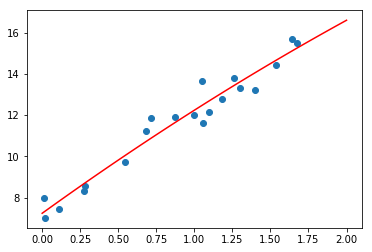

In [75]:
plt.plot(Xr,Yr,'o')
plt.plot(Xd,Ypred_lin2, c='red')
plt.show()

In [76]:
#calcul de l'erreur quadratique moyenne d'entrainement
Ypred_e2 = linreg.predict(X2)
ecarts = Yr-Ypred_e2
EQM = 1/m* ecarts.T.dot(ecarts)

In [77]:
EQM[0][0] 

0.3098040138311962

In [79]:
#calcul de l'erreur moyenne de test sur la totalité des données, cas quadratique
Ypred_total_2 = linreg.predict( np.concatenate((X0,X0**2),axis=1) )
ecarts2_test = Y0-Ypred_total_2
EQM2_test = 1/100* ecarts2_test.T.dot(ecarts2_test)
EQM2_test[0][0]

0.8302634426900497

## cas cubique

In [80]:
#augmentation de la dimension, on ajoute les carrés et cubes
X3 = np.concatenate((Xr,Xr**2,Xr**3), axis=1)

In [81]:
linreg.fit(X3,Yr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

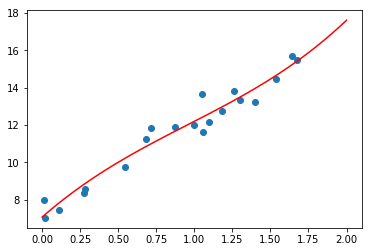

In [82]:
Ypred_lin2 = linreg.predict( np.concatenate((Xd,Xd**2,Xd**3),axis=1) )
plt.plot(Xr,Yr,'o')
plt.plot(Xd,Ypred_lin2, c='red')
plt.show()

In [83]:
#calcul de l'erreur quadratique moyenne d'entrainement
Ypred_e3 = linreg.predict(X3)
ecarts = Yr-Ypred_e3
EQM = 1/m* ecarts.T.dot(ecarts)

In [84]:
EQM[0][0]

0.29697796451458747

In [85]:
#calcul de l'erreur moyenne de test sur la totalité des données, cas cubique
Ypred_total_3 = linreg.predict( np.concatenate((X0,X0**2,X0**3),axis=1) )
ecarts3_test = Y0-Ypred_total_3
EQM3_test = 1/100* ecarts3_test.T.dot(ecarts3_test)
EQM3_test[0][0]

0.8399884684588319

In [89]:
import sklearn as sk
import sklearn.datasets
iris = sk.datasets.load_iris()
print(dir(iris))
print(iris['feature_names'])
print(iris['target_names'])

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [106]:
X_iris = iris['data'][:33,0:3]

In [107]:
Y_iris = iris['data'][:33,3]

In [108]:
linreg.fit(X_iris,Y_iris)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
Y_pred_iris = linreg.predict(X_iris)

In [110]:
ecarts_iris = Y_pred_iris - Y_iris

In [111]:
EQM= 1/33 * sum(ecarts_iris**2)

In [112]:
EQM

0.00785064245354508